In [2]:
#load file and appropriate preprocessing

import struct as st
import numpy as np
import matplotlib.pyplot as plt
filename = {'images' : 'train-images.idx3-ubyte' ,'labels' : 'train-labels.idx1-ubyte'}
train_imagesfile = open(filename['images'],'rb')

train_imagesfile.seek(0)
magic = st.unpack('>4B',train_imagesfile.read(4))

nImg = st.unpack('>I',train_imagesfile.read(4))[0] #num of images
nR = st.unpack('>I',train_imagesfile.read(4))[0] #num of rows
nC = st.unpack('>I',train_imagesfile.read(4))[0] #num of column


train_data = np.zeros((nImg,nR,nC))

nBytesTotal = nImg*nR*nC*1 #since each pixel data is 1 byte
train_data = 255 - np.asarray(st.unpack('>'+'B'*nBytesTotal,train_imagesfile.read(nBytesTotal))).reshape((nImg,nR,nC))
print (train_data.shape)


filename = {'images' : 't10k-images.idx3-ubyte' ,'labels' : 't10k-labels.idx1-ubyte'}
test_imagesfile = open(filename['images'],'rb')

test_imagesfile.seek(0)
magic = st.unpack('>4B',test_imagesfile.read(4))

nImg = st.unpack('>I',test_imagesfile.read(4))[0] #num of images
nR = st.unpack('>I',test_imagesfile.read(4))[0] #num of rows
nC = st.unpack('>I',test_imagesfile.read(4))[0] #num of column


test_data = np.zeros((nImg,nR,nC))

nBytesTotal = nImg*nR*nC*1 #since each pixel data is 1 byte
test_data = 255 - np.asarray(st.unpack('>'+'B'*nBytesTotal,test_imagesfile.read(nBytesTotal))).reshape((nImg,nR,nC))
print (test_data.shape)

print (type(test_data))

(60000, 28, 28)
(10000, 28, 28)
<class 'numpy.ndarray'>


In [3]:
#Load labels
intType = np.dtype( 'int32' ).newbyteorder( '>' )
nMetaDataBytes = 4 * intType.itemsize

train_labels = np.fromfile( 'train-labels.idx1-ubyte',dtype = 'ubyte' )[2 * intType.itemsize:]
test_labels = np.fromfile( 't10k-labels.idx1-ubyte',dtype = 'ubyte' )[2 * intType.itemsize:]


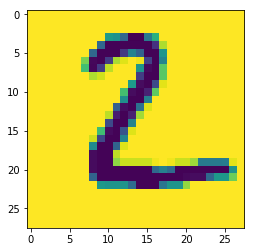

In [8]:
plt.imshow(test_data[1])
plt.show()

In [5]:
#reshape data
nsamples, nx, ny = train_data.shape
train_dataset = train_data.reshape((nsamples,nx*ny))
nsamples, nx, ny = test_data.shape
test_dataset = test_data.reshape((nsamples,nx*ny))


In [6]:
#Apply LR
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=300, multi_class='auto').fit(train_dataset, train_labels)


/home/anusha/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [7]:
#predict and store in file
pred=clf.predict(test_dataset)

p=np.eye(10)[pred]
p=p.astype(int)
np.savetxt("lr.csv", p, fmt='%i',delimiter=",")

score = clf.score(test_dataset, test_labels)
print(score)

0.9266


In [8]:
#apply RF
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 400)
rf.fit(train_dataset, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
#predict labels
predict=rf.predict(test_dataset)
print (predict)
score = rf.score(test_dataset, test_labels)
print(score)

[7 2 1 ... 4 5 6]
0.9702


In [48]:
#store in file
prf=np.eye(10)[predict]
prf=prf.astype(int)
np.savetxt("rf.csv", prf, fmt='%i', delimiter=",")